# さまざまな確率分布と最尤推定

## いきなり R & ポアソン分布で統計モデリング ?!

data : 50日分のe-mailの受け取った数

In [7]:
data

[1] 2 2 4 6 4 5 2 3 1 2 0 4 3 3 3 3 4 2 7 2 4 3 3 3 4 3 7 5 3 1 7 6 4 6 5 2 4 7
[39] 2 2 6 2 4 5 4 5 1 3 2 3

In [8]:
length(data)

[1] 50

In [9]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    3.56    4.75    7.00 

In [10]:
var(data)

[1] 2.986122

In [11]:
sd(data)

[1] 1.72804

__度数分布__

In [13]:
summary(as.factor(data))

0  1  2  3  4  5  6  7 
 1  3 11 12 10  5  4  4

In [14]:
table(data)

data
 0  1  2  3  4  5  6  7 
 1  3 11 12 10  5  4  4 

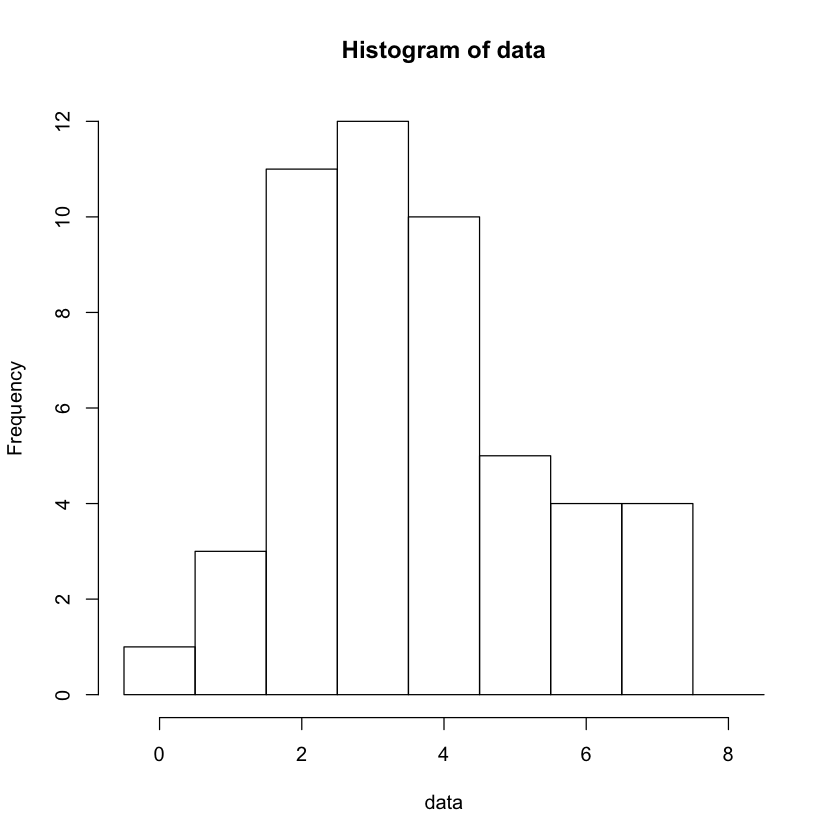

In [16]:
hist(data, breaks = seq(-0.5, 8.5, 1))

__ここまでにわかったこと__

- 一日にうけとるメイル数の平均値は 3.56 通
- しかしそれより多い日も少ない日もある

カウントデータの確率分布としてポアソン分布を（とりあえず）採用することはよくある．

__ポアソン分布の例__ (平均3.56のポアソン分布)

In [20]:
y <- 0:9
prob <- dpois(y, lambda = 3.56)

In [21]:
prob

[1] 0.02843882 0.10124222 0.18021114 0.21385056 0.19032700 0.13551282
 [7] 0.08040427 0.04089132 0.01819664 0.00719778

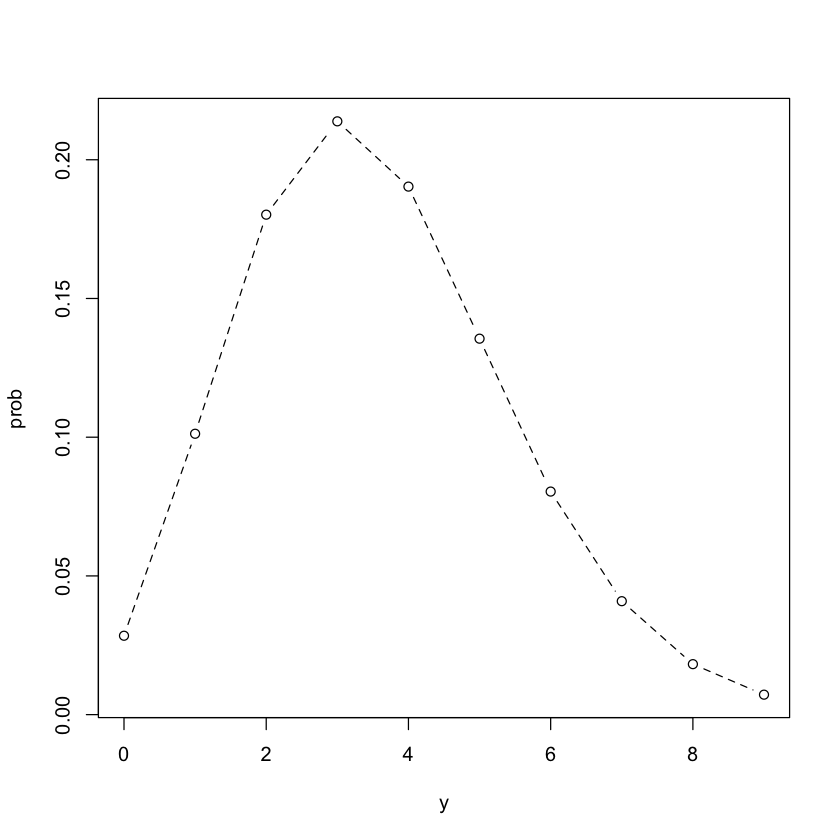

In [29]:
plot(y, prob, type = "b", lty = 2)

In [25]:
data.frame(y, prob)

y,prob
0,0.02843882
1,0.10124222
2,0.18021114
3,0.21385056
4,0.19032700
5,0.13551282
6,0.08040427
7,0.04089132
8,0.01819664
9,0.00719778


1日y通来る確率prob

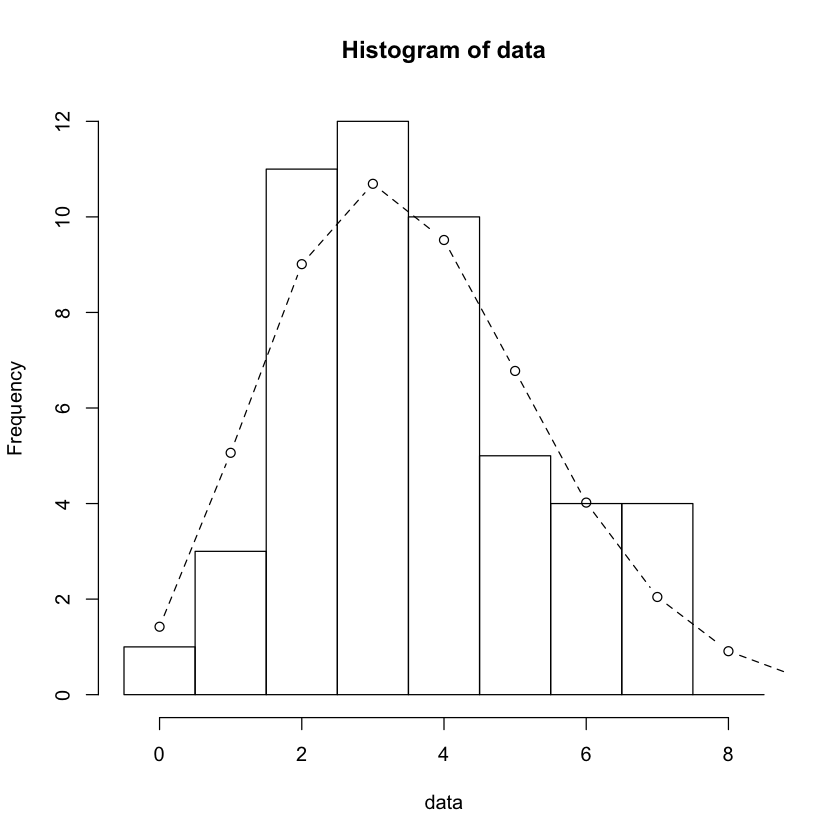

In [30]:
hist(data, breaks = seq(-0.5, 8.5, 1))
lines(y, prob * 50, type = "b", lty = 2) # 50 日ぶん

ポアソン分布でよく説明できていると言えそう．

## ポアソン分布とは何か?

ポアソン分布の確率密度関数
\begin{align}
    p(y \mid \lambda) = \frac{\lambda^y e^{-\lambda}}{y!}
\end{align}
- $y \in \mathbb{Z}_{\geq 0} \cup \{ \infty \}$
- $\sum_{y = 1}^\infty p(y \mid \lambda) = 1$
- 分布の平均は$\lambda$
- 分布の形を決めるパラメーターは$\lambda$のみ
- 分散 $=$ 平均

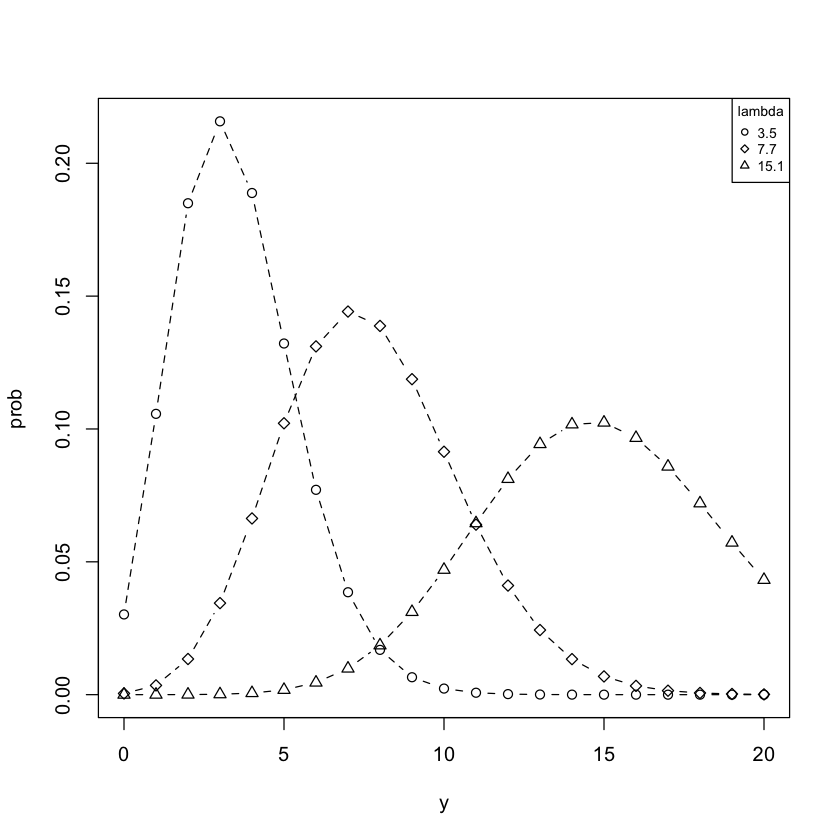

In [31]:
y <- 0:20
plot(y, dpois(y, lambda = 3.5), type = "b", lty = 2, pch = 21, ylab = "prob")
lines(y, dpois(y, lambda = 7.7), type = "b", lty = 2, pch = 23)
lines(y, dpois(y, lambda = 15.1), type = "b", lty = 2, pch = 24)
legend("topright", legend = c(3.5, 7.7, 15.1), pch = c(21, 23, 24),title = "lambda", cex = 0.7)

最初の例でポアソン分布を採用したのは
- 取りうる整数（無限大を許す）
- 標本平均と標本分散が大体等しい

から．

上の例でポアソン分布になる必要条件は，
- 季節性がない
- 毎日のメール数は独立
- 1日の中でも各メールの来信は独立

(山が２つとかは表現できないし)

これが満たされないときはどうする？
- 近似としてポアソン分布を採用
- ポアソン分布を修正した確率分布を採用

## 統計モデルの中核概念: 乱数発生と推定


中核となる考えは
- バラツキのあるデータは何かしらの確率分布に従ってる
- そのデータから分布を推定できる

分布の形はパラメータに依存してるから，パラメーター推定とも言える．したがって

- 現象が従う確率分布は？
- データからどのようにパラメーターを推定する？

ということをはっきりさせることが重要なのがわかる．

（こういった行為の後のパラメータの比較検討が検定）

__乱数生成__

In [35]:
# ポアソン分布に従う乱数
rpois(50, lambda = 3.5)

[1] 7 3 4 4 1 3 3 4 7 5 2 6 3 3 4 3 3 6 2 3 5 4 1 1 8 7 5 4 1 3 2 2 4 3 2 4 3 5
[39] 3 3 5 4 4 3 3 2 1 3 2 0

In [36]:
rpois(50, lambda = 3.5)

[1] 3 4 6 2 6 5 2 7 2 1 4 8 6 6 4 5 4 3 8 3 5 2 3 5 2 0 1 8 1 5 5 6 3 3 0 4 3 1
[39] 3 5 3 0 4 2 3 3 4 2 3 2

## ポアソン分布のパラメーター λ を最尤推定

__最尤推定法__

- 標本平均$3.56$が本当の平均に近いと考えた理由

$y_i \colon$ $i$日目のメール来信数

__尤度__ : 平均 $\lambda$ のポアソン分布から $(y_i)_{i}$ が得られる確率

ポアソン分布を $p(y \mid \lambda) = \frac{\lambda^y e^{-\lambda}}{y!}$ とすると尤度 $L(\lambda \mid (y_i)_i)$ は

\begin{align}
    L(\lambda \mid (y_i)_{i}) 
    &=  \prod_{i = 1}p(y_i \mid \lambda) \\
    &= \prod \frac{\lambda^{y_i} e^{-\lambda}}{y_i!}
\end{align}

もっとも元のデータになる確率が高いパラメーター $\lambda$ を探そう．

対数変換しとく $\colon$
\begin{align}
    \log L(\lambda \mid (y_i)_{i}) = \sum \{y_i \log (\lambda) - \lambda - \sum_{i=1}^{y_i}\log(k)\}
\end{align}

$L$ を最大化 $\Longleftrightarrow$　$\log L(\lambda \mid (y_i)_{i})$ を最大化

最大化するパラメーターを$\hat{\lambda}$ とする．

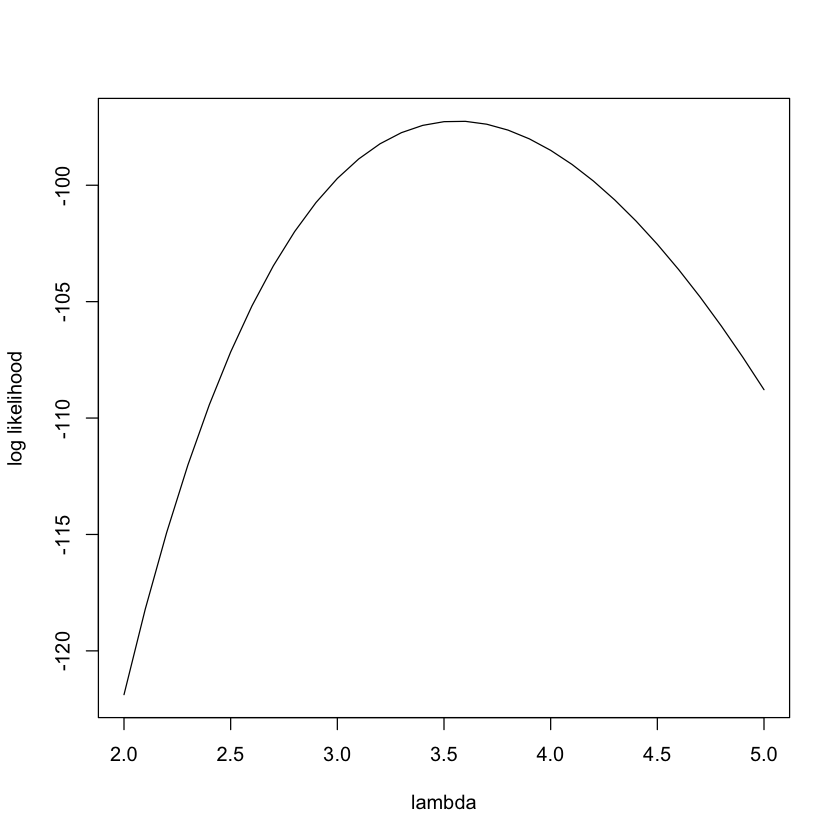

In [37]:
lambda <- seq(2, 5, 0.1)
likelihood <- function(lambda) sum(dpois(data, lambda, log = TRUE))
 plot(
 lambda,
 sapply(lambda, likelihood),
 type = "l",
 xlab = "lambda",
 ylab = "log likelihood"
)

$\hat{\lambda}$ を__最尤推定値__と呼ぶ．
(この場合は微分して極値を求めるのは簡単にできるね)

## 二項分布で「あり・なし」データをモデル化

カウントデータに使えるほかの分布：__二項分布__
例えばコイン．取りうる値は$\{ 0, 1, \dots , N\}$ ($N$個のコイン)
\begin{align}
    p(y \mid N, q) = 
    \begin{pmatrix}
        N\\
        y
    \end{pmatrix}
    q^{y}(1- q)^{N-y}
\end{align}

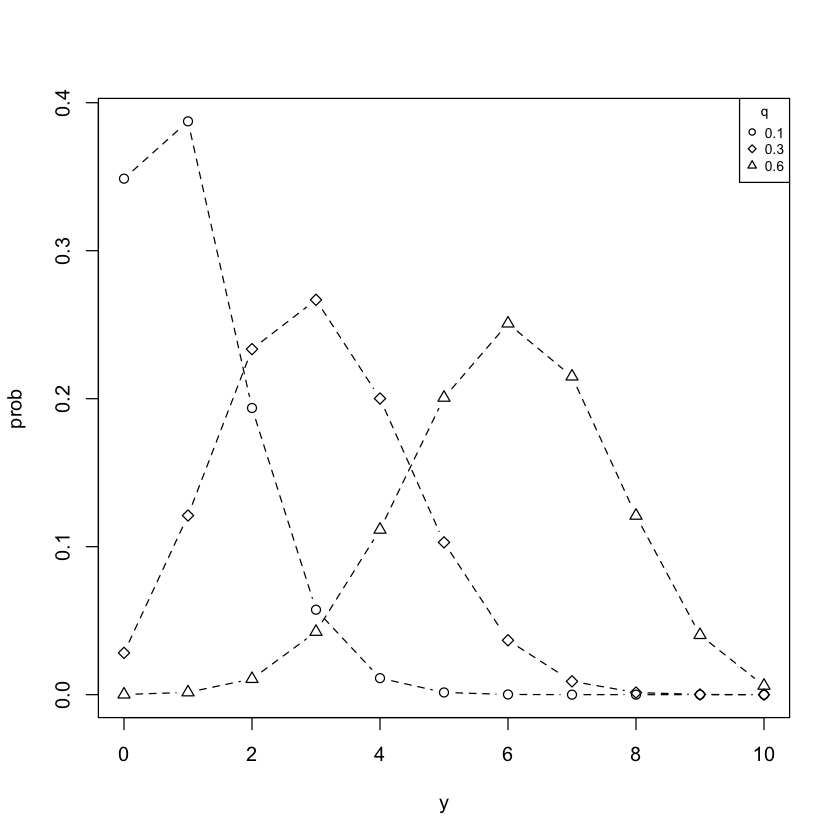

In [38]:
y <- 0:10
plot(y, dbinom(y, 10, prob = 0.1), type = "b", lty = 2, pch = 21, ylab = "prob")
lines(y, dbinom(y, 10, prob = 0.3), type = "b", lty = 2, pch = 23)
lines(y, dbinom(y, 10, prob = 0.6), type = "b", lty = 2, pch = 24)
legend("topright", legend = c(0.1, 0.3, 0.6), pch = c(21, 23, 24),title = "q", cex = 0.7)

## 正規分布についてもちょっとばかり

__正規分布__
- 連続値
- パラメーター平均値を持つ
- 平均$\mu \in [- \infty, \infty]$
- 標準偏差をゼロ以上で設定可能

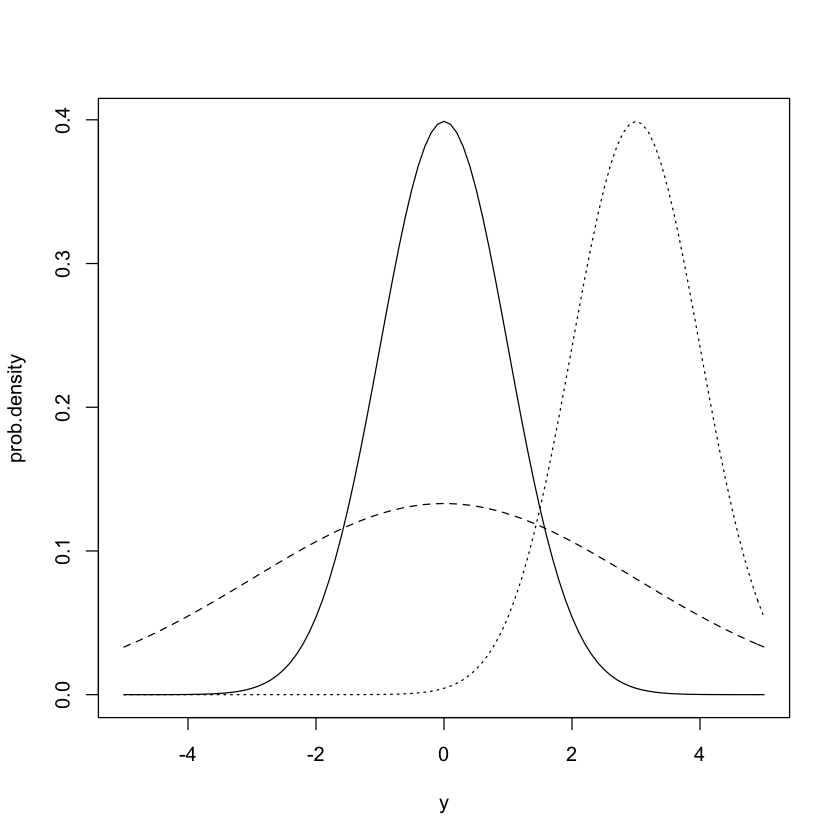

In [39]:
y <- seq(-5, 5, 0.1)
plot(y, dnorm(y, mean = 0, sd = 1), type = "l",ylab = "prob.density") # 実線
lines(y, dnorm(y, mean = 0, sd = 3), lty = 2) # 破線
lines(y, dnorm(y, mean = 3, sd = 1), lty = 3) # 点線

- このグラフは確率でなくて確率密度
\begin{align}
    p(y \mid \mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{(y - \mu)^2}{2\sigma^2})
    \end{align}

問題　成人男性の平均身長170, 標準偏差5とする．
ある人の身長が177から178にある確率

In [40]:
pnorm(178, mean = 170, sd = 5) - pnorm(177, mean = 170, sd = 5)

[1] 0.02595737

In [41]:
dnorm(177.5, mean = 170, sd = 5) * 1.0 # 近似的な確率の簡単計算法

[1] 0.02590352

 問題　ある人の身長が 178 cm ぴったりである 確率を計算せよ

In [42]:
pnorm(178, mean = 170, sd = 5) - pnorm(178, mean = 170, sd = 5)

[1] 0

In [43]:
dnorm(178, mean = 170, sd = 5)

[1] 0.02218417

- 正規分布における最尤推定法は最小二乗法　

## 統計モデルにどの確率分布を使えそうか

- 連続？離散？
- 取りうる値の範囲は？
- 分散と平均の関係は？

-  ポアソン分布: データが離散値，ゼロ以上の範囲，上限とくになし，標本平均 ≈ 標本分散
-  負の二項分布: データが離散値，ゼロ以上の範囲，上限とくになし，標本平均 < 標本分散
-  二項分布: データが離散値，ゼロ以上で有限の範囲 ({0, 1, 2, · · · , N })
-  正規分布: データが連続値，範囲が [−∞, +∞]
-  対数正規分布: データが連続値，範囲が [0, +∞]
-  ガンマ分布: データが連続値，範囲が [0, +∞]
-  ベータ分布: データが連続値，範囲が [0, 1]
44. ただし σ が一定， といった仮定が必要です ね.